<a href="https://colab.research.google.com/github/Binzbo/Mini-Project/blob/main/CPB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CPB4.xlsx to CPB4.xlsx


In [ ]:
import pandas as pd

# Ubah 'nama_file.xlsx' dengan nama file Excel yang ingin Anda baca
nama_file = 'CPB4.xlsx'

# Baca file Excel dan simpan dalam DataFrame
dataframe = pd.read_excel(nama_file, header=None)

# Cetak header
print("Header dari file Excel:")
print(dataframe.head())


Header dari file Excel:
          0         1         2         3         4      5
0    powLv1    powLv2    powLv3    powLv4    powLv5  kelas
1  0.448457   0.22086  0.143938  0.104903  0.081841      B
2  0.448288  0.221315  0.144335  0.104964  0.081099      B
3  0.448916  0.221049  0.143741  0.105198  0.081096      B
4    0.4496  0.221141  0.144107   0.10493  0.080222      B


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np

# Ubah 'nama_file.xlsx' dengan nama file Excel yang ingin Anda baca
nama_file = 'CPB4.xlsx'

# Baca data dari file Excel
data = pd.read_excel(nama_file)

# Misalkan kolom terakhir adalah kolom target (y) dan kolom lainnya adalah fitur (X)
X = data.iloc[:, :-1]  # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Ambil kolom terakhir sebagai target

# Inisialisasi model SVM
model = SVC(kernel='linear')

# Inisialisasi 10-fold Cross-Validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan Cross-Validation
scores = cross_val_score(model, X, y, cv=k_fold)

# Menampilkan hasil Cross-Validation
print("Akurasi setiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))


Akurasi setiap fold: [0.7  0.45 0.85 0.45 0.45 0.45 0.8  0.4  0.45 0.45]
Rata-rata akurasi: 0.5450000000000002


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

nama_file = 'CPB4.xlsx'

data = pd.read_excel(nama_file)

X = data.iloc[:, :-1]  # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Ambil kolom terakhir sebagai target

# Bagi data menjadi data pelatihan (75%) dan data pengujian (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inisialisasi model SVM
model = SVC(kernel='linear')

# Latih model dengan data pelatihan
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("banyak data latih train-test:", len (X_train))
print("banyak data uji train-test:", len (X_test))

Akurasi: 0.46
banyak data latih train-test: 150
banyak data uji train-test: 50


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

nama_file = 'CPB4.xlsx'


data = pd.read_excel(nama_file)

X = data.iloc[:, :-1]  # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Ambil kolom terakhir sebagai target

# Bagi data menjadi data pelatihan (50%) dan data sisanya
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.5, random_state=42)

# Bagi data sisanya menjadi data validasi (50%) dan data pengujian (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Print jumlah data
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data validasi:", len(X_validation))
print("Jumlah data pengujian:", len(X_test))

# Inisialisasi model SVM
model = SVC(kernel='linear')

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

y_pred_validation = model.predict(X_validation)

accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Akurasi pada data validasi:", accuracy_validation)


y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Akurasi pada data pengujian:", accuracy_test)


Jumlah data pelatihan: 100
Jumlah data validasi: 50
Jumlah data pengujian: 50
Akurasi pada data validasi: 0.56
Akurasi pada data pengujian: 0.42


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
nama_file = 'CPB4.xlsx'
data = pd.read_excel(nama_file)

X = data.iloc[:, :-1]  # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Ambil kolom terakhir sebagai target

# Bagi data menjadi data pelatihan (70%) dan data pengujian (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'C'])

sensitivity = recall

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", sensitivity)
print("Specificity:", specificity)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8666666666666667
Precision: 0.896551724137931
Recall (Sensitivity): 0.8387096774193549
Specificity: 1.0
F1-Score: 0.8666666666666666
Confusion Matrix:
[[26  0]
 [ 0  0]]


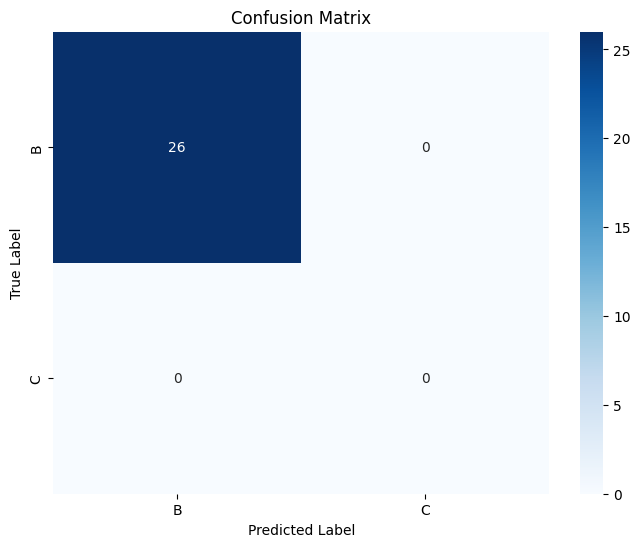

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nama_file = 'CPB4.xlsx'

data = pd.read_excel(nama_file)
X = data.iloc[:, :-1]  # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Ambil kolom terakhir sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'C'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'C'], yticklabels=['B', 'C'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
